An online question and answer platform has hired you as a data scientist to identify the best question authors on the
platform. This identification will bring more insight into increasing the user engagement. Given the tag of the 
question, number of views received, number of answers, username and reputation of the question author, the problem
requires you to predict the upvote count that the question will receive.

Data Dictionary
 

Variable	Definition
ID	Question ID
Tag	Anonymised tags representing question category
Reputation	Reputation score of question author
Answers	Number of times question has been answered
Username	Anonymised user id of question author
Views	Number of times question has been viewed
Upvotes	(Target) Number of upvotes for the question
 

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [38]:
trainset = pd.read_csv(r'C:\Users\Shweta\Desktop\Data Science\Python Data Science\dataset\upvotes\train.csv')
testset = pd.read_csv(r'C:\Users\Shweta\Desktop\Data Science\Python Data Science\dataset\upvotes\test.csv')

In [39]:
print (trainset.head())
print (trainset.describe())
print (trainset.shape)

       ID Tag  Reputation  Answers  Username    Views  Upvotes
0   52664   a      3942.0      2.0    155623   7855.0     42.0
1  327662   a     26046.0     12.0     21781  55801.0   1175.0
2  468453   c      1358.0      4.0     56177   8067.0     60.0
3   96996   a       264.0      3.0    168793  27064.0      9.0
4  131465   c      4271.0      4.0    112223  13986.0     83.0
                  ID    Reputation        Answers       Username  \
count  330045.000000  3.300450e+05  330045.000000  330045.000000   
mean   235748.682789  7.773147e+03       3.917672   81442.888803   
std    136039.418471  2.706141e+04       3.579515   49215.100730   
min         1.000000  0.000000e+00       0.000000       0.000000   
25%    117909.000000  2.820000e+02       2.000000   39808.000000   
50%    235699.000000  1.236000e+03       3.000000   79010.000000   
75%    353620.000000  5.118000e+03       5.000000  122559.000000   
max    471493.000000  1.042428e+06      76.000000  175738.000000   

         

In [40]:
print (testset.head())
print (testset.describe())
print (testset.shape)

       ID Tag  Reputation  Answers  Username    Views
0  366953   a      5645.0      3.0     50652  33200.0
1   71864   c     24511.0      6.0     37685   2730.0
2  141692   i       927.0      1.0    135293  21167.0
3  316833   i        21.0      6.0    166998  18528.0
4  440445   i      4475.0     10.0     53504  57240.0
                  ID    Reputation        Answers       Username         Views
count  141448.000000  1.414480e+05  141448.000000  141448.000000  1.414480e+05
mean   235743.073497  7.920927e+03       3.914873   81348.231117  2.984633e+04
std    136269.867118  2.791072e+04       3.577460   49046.098215  8.034374e+04
min         7.000000  0.000000e+00       0.000000       4.000000  9.000000e+00
25%    117797.000000  2.860000e+02       2.000000   40222.750000  2.608000e+03
50%    235830.000000  1.245000e+03       3.000000   78795.500000  8.977000e+03
75%    353616.000000  5.123000e+03       5.000000  122149.000000  2.698925e+04
max    471488.000000  1.042428e+06      73.0

In [41]:
print (trainset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB
None


In [42]:
X= trainset.drop(['Upvotes'], axis =1)

#Combine the two dataset
X['source'] = "X"
testset['source'] = "test"

data = pd.concat([X, testset], ignore_index = True)

In [43]:
print(data.isna().sum())

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
source        0
dtype: int64


In [44]:
print((data==0).sum())

ID               0
Tag              0
Reputation    9453
Answers       2958
Username         1
Views            0
source           0
dtype: int64


Text(0.5,1,'Number of Upvotes Distribution')

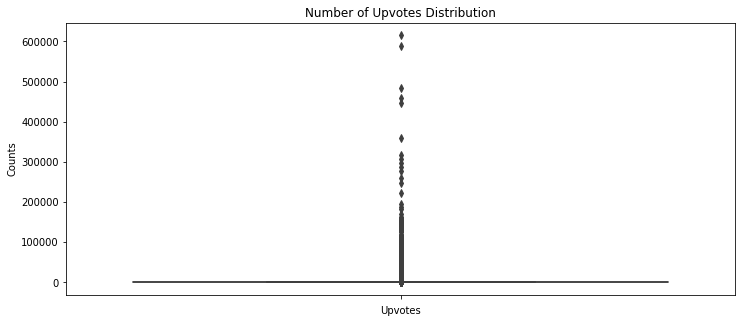

In [45]:
import seaborn as sns

plt.figure(figsize=(12,5))
sns.boxplot(y= "Upvotes", data =trainset)
plt.xlabel('Upvotes')
#plt.xlim(0,200)
plt.ylabel('Counts')
plt.title('Number of Upvotes Distribution')

C:\Users\Shweta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


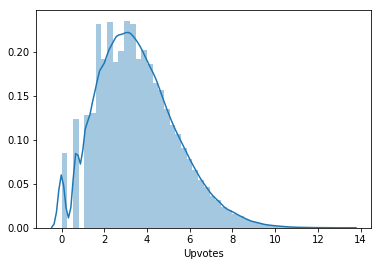

In [46]:
sns.distplot(np.log(trainset.Upvotes +1))

In [47]:
data.columns

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'source'], dtype='object')

In [48]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

ID              int64
Reputation    float64
Answers       float64
Username        int64
Views         float64
dtype: object

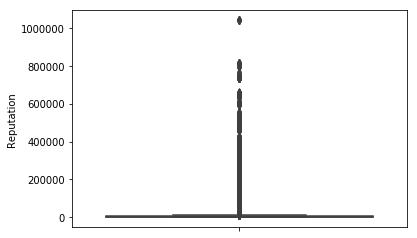

In [49]:
sns.boxplot(y= "Reputation", data = numeric_features)

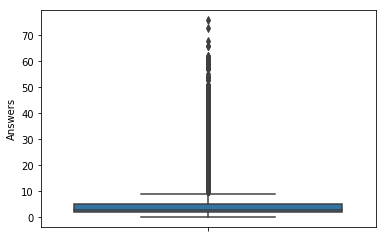

In [50]:
sns.boxplot( y = "Answers" , data = numeric_features)

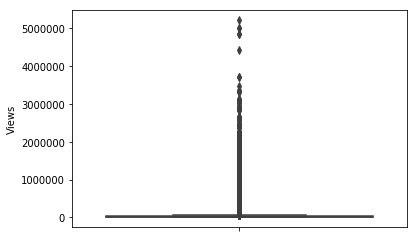

In [51]:
sns.boxplot(data= numeric_features, y= "Views")

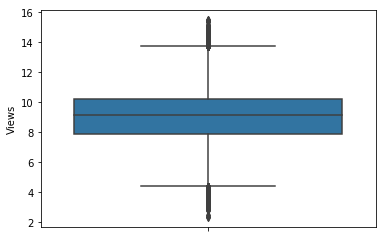

In [52]:
sns.boxplot(data= numeric_features, y= np.log(data.Views + 1))

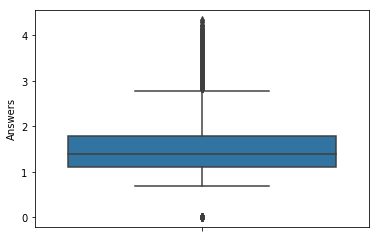

In [53]:
sns.boxplot(data= numeric_features, y= np.log(data.Answers + 1))

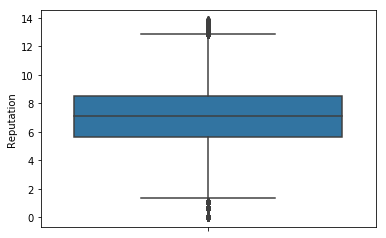

In [54]:
sns.boxplot(data= numeric_features, y= np.log(data.Reputation + 1))

In [55]:
#data.Reputation = data.Reputation.astype(int)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471493 entries, 0 to 471492
Data columns (total 7 columns):
ID            471493 non-null int64
Tag           471493 non-null object
Reputation    471493 non-null float64
Answers       471493 non-null float64
Username      471493 non-null int64
Views         471493 non-null float64
source        471493 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 25.2+ MB


In [57]:
label =LabelEncoder()
data['Tag']=label.fit_transform(data['Tag'])


In [58]:
data.Tag = data.Tag.astype('int')
data.drop(['Username','ID'],axis=1,inplace=True)

In [59]:
data.head()

,Tag,Reputation,Answers,Views,source
0,0,3942.0,2.0,7855.0,X
1,0,26046.0,12.0,55801.0,X
2,1,1358.0,4.0,8067.0,X
3,0,264.0,3.0,27064.0,X
4,1,4271.0,4.0,13986.0,X


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471493 entries, 0 to 471492
Data columns (total 5 columns):
Tag           471493 non-null int32
Reputation    471493 non-null float64
Answers       471493 non-null float64
Views         471493 non-null float64
source        471493 non-null object
dtypes: float64(3), int32(1), object(1)
memory usage: 16.2+ MB


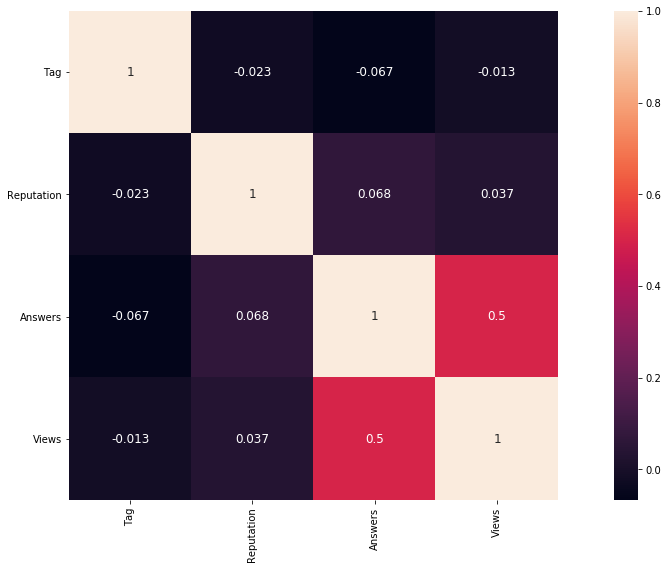

In [61]:
correlations = data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(correlations, square = True,annot_kws={'size': 12}, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [62]:
train = data.loc[data['source']=="X"]
test = data.loc[data['source']=="test"]
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\Shweta\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [63]:
y = trainset.Upvotes

In [64]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=7)
pd_watched = bn.transform([train['Answers']])[0]
train['pd_watched'] = pd_watched

C:\Users\Shweta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [65]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
train_x = sc.fit_transform(train)


C:\Users\Shweta\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shweta\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, y ,test_size = 0.3)

In [67]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)
predict = LR.predict(x_test)

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, predict)

0.28017826709052507

when the  dependent variable is non-categorical vaiablee and linear regression fails to predict right dependent 
variable(accuracy is less/ the MSE  is < 10/5), we use polynomial Regression

In [69]:
poly = PolynomialFeatures(degree=4, interaction_only=False, include_bias=True)  
#the equation that system will make,will have independent var to the power of 4
X_train_poly = poly.fit_transform(x_train)  # this fuction will convert data to polynomial data
X_test_poly = poly.fit_transform(x_test)
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

In [70]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9158578378490639


In [71]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=7)
pd_watched = bn.transform([test['Answers']])[0]
test['pd_watched'] = pd_watched

test = sc.fit_transform(test)

C:\Users\Shweta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Shweta\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shweta\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [72]:
pred_test = regressor.predict(poly.fit_transform(test))
pred_test

array([230.55758424, -37.56243584,  21.40756917, ...,  60.63892305,
        29.78731432,  12.95873987])

In [73]:
output= pd.DataFrame(testset,columns= ['ID'])
output['Upvotes']= pred_test
output.to_csv('my_submission4.csv', index=False)